In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv("/home/mittesh/Orinson_technologies/ML-Linear-Regression/data/HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [13]:
df = df.drop(columns = "Index")
df.shape

(25000, 2)

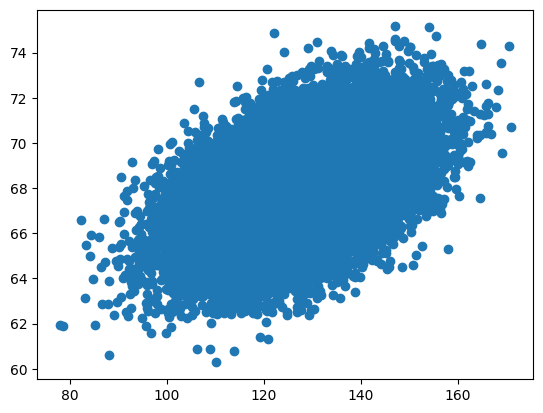

In [14]:
# scatter plot
plt.scatter(df['Weight(Pounds)'], df['Height(Inches)'])

In [15]:
# corelation
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


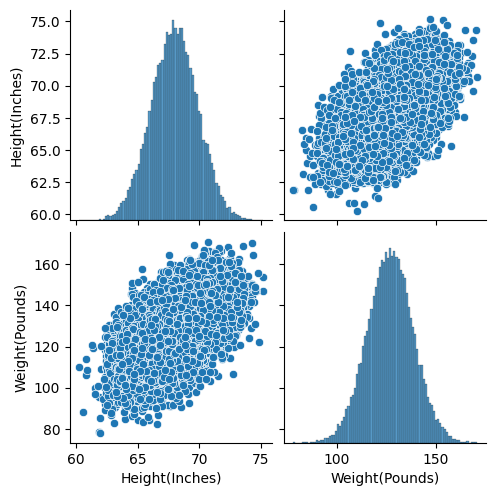

In [16]:
# seaborn for visualization
sns.pairplot(df)

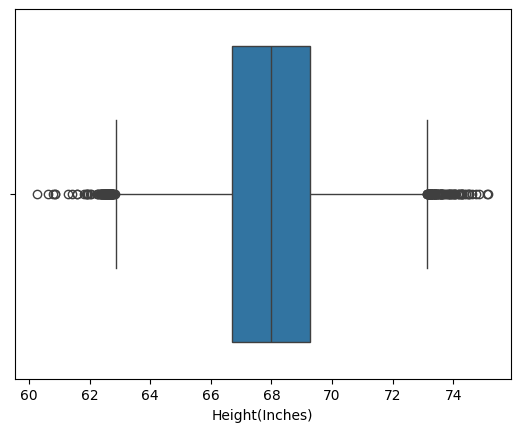

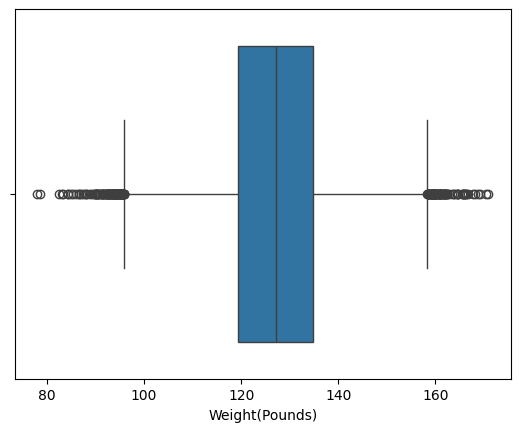

In [17]:
for col in df.columns:
    sns.boxplot(
        data = df,
        x = df[col]
    )
    plt.show()

In [19]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f'Lower bound:\n{lower}\n\nUpper bound:\n{upper}')


Lower bound:
Height(Inches)    62.851557
Weight(Pounds)    95.932412
dtype: float64

Upper bound:
Height(Inches)     73.125798
Weight(Pounds)    158.269113
dtype: float64


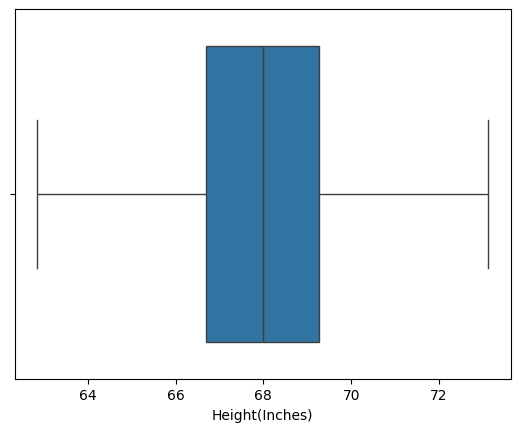

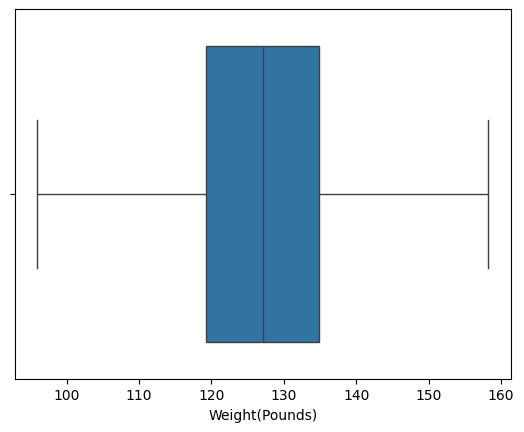

In [21]:
for col in df.columns:
    df[col] = np.where(df[col] > upper[col],upper[col],df[col])
    df[col] = np.where(df[col] < lower[col],lower[col],df[col])

    sns.boxplot(
        data = df,
        x = df[col]
    )
    
    plt.show()

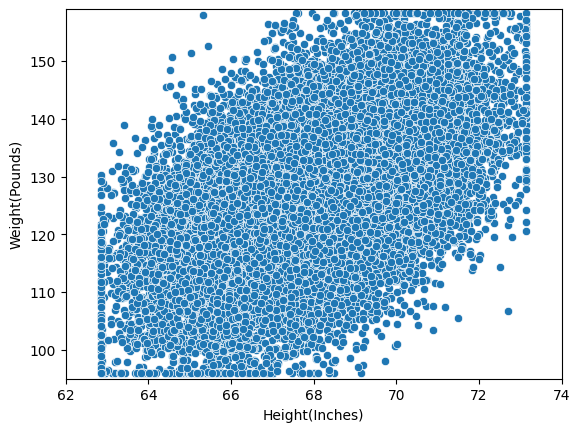

In [22]:
sns.scatterplot(
    x = 'Height(Inches)',
    y = 'Weight(Pounds)',
    data = df
)
plt.xlim(62, 74)
plt.ylim(95, 159)
plt.show()

In [23]:
df.head(5)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [24]:
y=df['Weight(Pounds)']
X=df[["Height(Inches)"]]

In [25]:
from sklearn.model_selection import train_test_split # train and test
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=42)

In [26]:
X_train.shape

(17500, 1)

In [27]:
from sklearn.preprocessing import StandardScaler # standardization
scaler=StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LinearRegression # applying linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
print("slope:",lr.coef_)
print("intercept:",lr.intercept_)

slope: [5.76729887]
intercept: 127.06857121085712


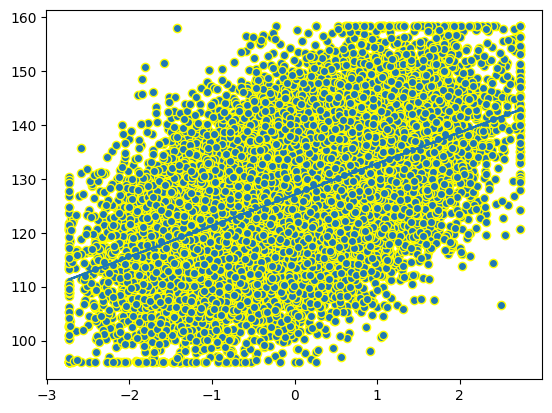

In [31]:
plt.scatter(X_train,y_train, edgecolors='yellow') # plotting the training  data best fit line
plt.plot(X_train,lr.predict(X_train))

In [32]:
# prediction of test data >>predicted height output = intercept + coef_(weights)
y_pred=lr.predict(X_test)

In [33]:
# performance 
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred, y_test)
rmse=np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

8.003224012339656
100.22944299278257
10.011465576666714


In [34]:
from sklearn import metrics

r2 = metrics.r2_score(y_test, y_pred)
r2

0.2587485181888505

In [35]:
# displaying the adjusted r2 score
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25864965829530406

In [36]:
# OLS linear regression 
import statsmodels.api as sm
model=sm.OLS(y_train, X_train).fit()

prediction=model.predict(X_test)
print(prediction)

[ 1.3108788  -0.30600735 -1.03324465 ... -8.84618284  6.53325809
 -8.71602694]


In [37]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Weight(Pounds)   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              35.83
Date:                Wed, 02 Oct 2024   Prob (F-statistic):                    2.20e-09
Time:                        16:50:44   Log-Likelihood:                     -1.0967e+05
No. Observations:               17500   AIC:                                  2.193e+05
Df Residuals:                   17499   BIC:                                  2.193e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [38]:
# prediction of new data 
lr.predict(scaler.transform([[70]]))

/home/mittesh/Orinson_technologies/ML-Linear-Regression/lr_venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([133.20563338])